# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import scipy.interpolate  as s
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../LargeFilesResults/Model'  # where the outputs of this notebook will be saved

In [3]:
my_summary = pd.read_csv(os.path.join(results_path, 'allprobabilities_summ_rmshared_revised.csv'), 
                         index_col="Unnamed: 0")
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_rmshared_revised.csv'))

# Posteriors

In [4]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = np.array(['#8c510a','#bf812d','#80cdc1','#35978f','#01665e'])
figsize      = (15, 15)
alpha        = 0.6

In [5]:
dimensions = posteriors.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


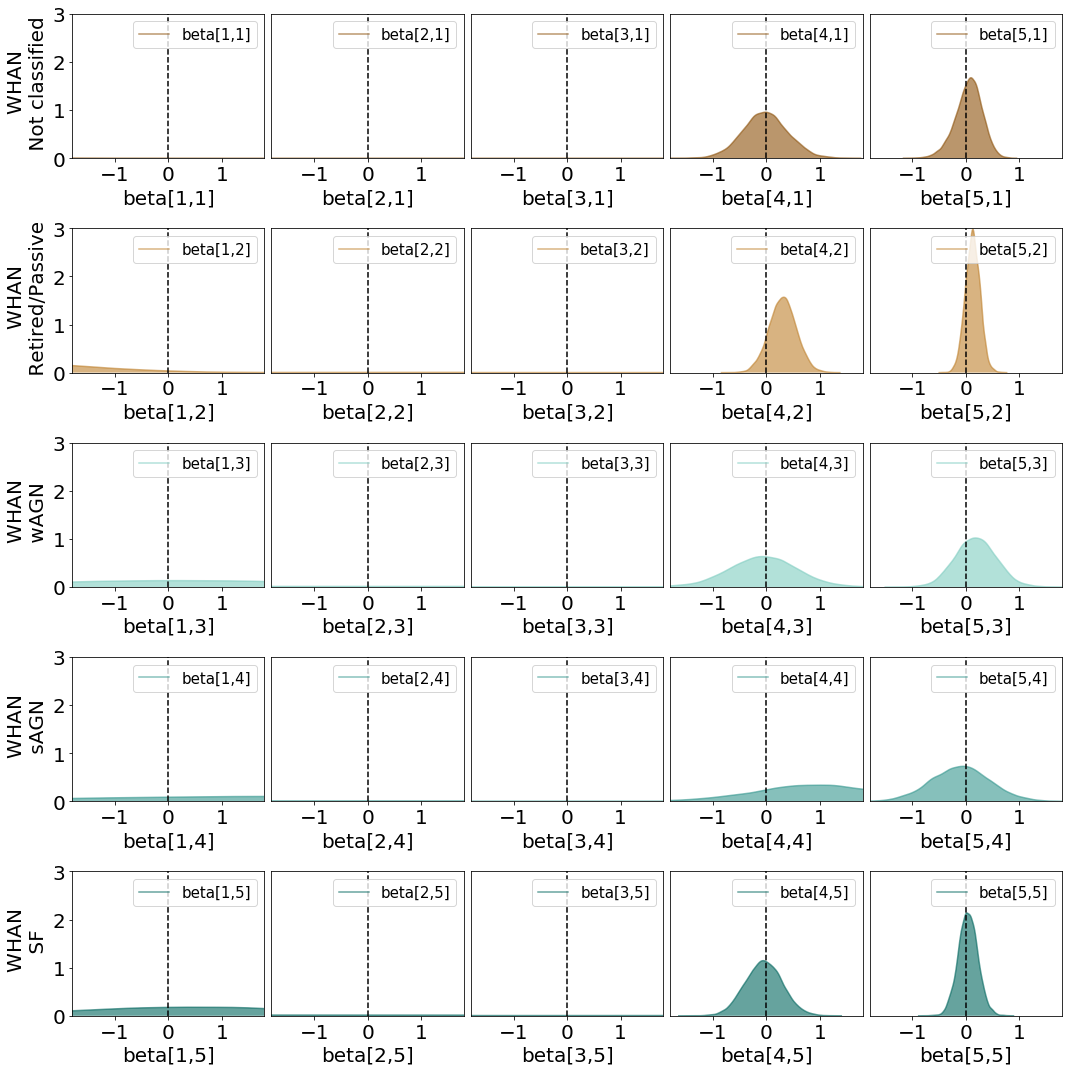

In [6]:
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
        plt.legend(loc='upper right', fontsize=15)
        plt.axvline(x=0, linestyle="--", color='black')
        plt.xlabel(r"%s" % str(name_temp), fontsize=20)
        plt.tick_params('both', labelsize='20')
        plt.xlim([-1.8,1.8])
        plt.ylim([0,3.])      
        if (each_class==0):
            plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
        elif (each_class!=0): 
            plot_temp.yaxis.set_visible(False)            
        position+=1

plt.tight_layout(w_pad=0)
# plt.savefig(os.path.join(results_path, '25betas_rmshared_revised.png'), bbox_inch='tight')
# plt.savefig(os.path.join(results_path, '25betas_rmshared_revised.pdf'), bbox_inch='tight')
plt.show()

# Probability x Mass

In [7]:
header = my_summary.keys()

In [8]:
class01, class02, class03, class04, class05 = np.split(my_summary.values, 5)

In [9]:
class01_df = pd.DataFrame(class01)
class01_df.columns = header

In [10]:
class02_df = pd.DataFrame(class02)
class02_df.columns = header

In [11]:
class03_df = pd.DataFrame(class03)
class03_df.columns = header

In [12]:
class04_df = pd.DataFrame(class04)
class04_df.columns = header

In [13]:
class05_df = pd.DataFrame(class05)
class05_df.columns = header

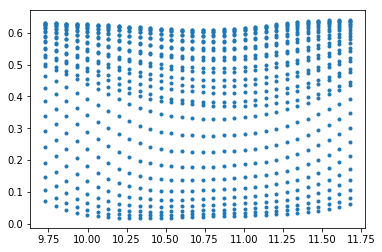

In [14]:
plt.plot(class01_df["LOG_STELLAR_MASS"], class01_df["mean"], '.')
plt.show()

In [15]:
class01_df.describe()

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
count,900.0,900.000000,900.000000,9.000000e+02,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,12000.0,0.409595,0.171123,4.402938e-02,0.116762,0.274812,0.412699,0.540191,0.711894,0.854212,10.704026,0.208120
std,0.0,0.203794,0.090638,6.935227e-02,0.125327,0.174704,0.228214,0.273054,0.272393,0.197574,0.582055,0.083724
min,12000.0,0.018418,0.018873,9.081398e-08,0.000091,0.003784,0.011098,0.023591,0.069121,0.207470,9.729482,0.067940
25%,12000.0,0.232292,0.092014,2.966821e-04,0.010577,0.110224,0.200288,0.310251,0.537961,0.782325,10.199952,0.135613
50%,12000.0,0.483075,0.161637,7.090057e-03,0.068634,0.289751,0.483099,0.631412,0.811244,0.953615,10.704026,0.208120
75%,12000.0,0.590022,0.238708,5.846825e-02,0.194060,0.430723,0.608811,0.742683,0.926737,0.991371,11.208100,0.280627
max,12000.0,0.639413,0.363037,3.234954e-01,0.446765,0.564832,0.767703,0.955852,0.998590,0.999978,11.678570,0.348300


In [16]:
unique_masses = np.unique(class01_df["LOG_STELLAR_MASS"].values)

### class 01 - unclassified

In [17]:
for i in range(unique_masses.size):
    summary_temp  = pd.DataFrame(class01_df[class01_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
    mean_temp     = summary_temp.loc[["mean"]]
    if i==0:
        mean_all01_df = mean_temp
    else:
        mean_all01_df = pd.concat([mean_all01_df, mean_temp])

### class 02 - retired/passive

In [18]:
for i in range(unique_masses.size):
    summary_temp  = pd.DataFrame(class02_df[class02_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
    mean_temp     = summary_temp.loc[["mean"]]
    if i==0:
        mean_all02_df = mean_temp
    else:
        mean_all02_df = pd.concat([mean_all02_df, mean_temp])

### class 03 - wAGN

In [19]:
for i in range(unique_masses.size):
    summary_temp  = pd.DataFrame(class03_df[class03_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
    mean_temp     = summary_temp.loc[["mean"]]
    if i==0:
        mean_all03_df = mean_temp
    else:
        mean_all03_df = pd.concat([mean_all03_df, mean_temp])

### class 04 - sAGN

In [20]:
for i in range(unique_masses.size):
    summary_temp  = pd.DataFrame(class04_df[class04_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
    mean_temp     = summary_temp.loc[["mean"]]
    if i==0:
        mean_all04_df = mean_temp
    else:
        mean_all04_df = pd.concat([mean_all04_df, mean_temp])

### class 05 - SF

In [21]:
for i in range(unique_masses.size):
    summary_temp  = pd.DataFrame(class05_df[class05_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
    mean_temp     = summary_temp.loc[["mean"]]
    if i==0:
        mean_all05_df = mean_temp
    else:
        mean_all05_df = pd.concat([mean_all05_df, mean_temp])

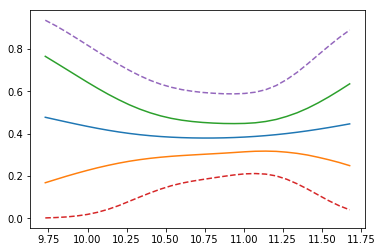

In [22]:
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['mean'], '-')
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['25%'], '-')
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['75%'], '-')
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['2.5%'], '--')
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['97.5%'], '--')

plt.show()

In [23]:
n_classes = np.split(my_summary.values, 5)

In [24]:
list_of_dfs = [mean_all01_df, mean_all02_df, mean_all03_df, mean_all04_df, mean_all05_df]

In [25]:
for n in range(len(n_classes)):
    list_of_dfs[n].to_csv(os.path.join(results_path, 'data_for_plotting_class%d.csv' % (n+1)))

In [26]:
print(unique_masses)

[ 9.729482    9.79669193  9.86390186  9.93111179  9.99832172 10.06553166
 10.13274159 10.19995152 10.26716145 10.33437138 10.40158131 10.46879124
 10.53600117 10.6032111  10.67042103 10.73763097 10.8048409  10.87205083
 10.93926076 11.00647069 11.07368062 11.14089055 11.20810048 11.27531041
 11.34252034 11.40973028 11.47694021 11.54415014 11.61136007 11.67857   ]


# Probability x Z ---  to be continued

In [27]:
unique_redshifts = np.unique(my_summary['Z'].values)
print (unique_redshifts)

[0.06794    0.07760759 0.08727517 0.09694276 0.10661034 0.11627793
 0.12594552 0.1356131  0.14528069 0.15494828 0.16461586 0.17428345
 0.18395103 0.19361862 0.20328621 0.21295379 0.22262138 0.23228897
 0.24195655 0.25162414 0.26129172 0.27095931 0.2806269  0.29029448
 0.29996207 0.30962966 0.31929724 0.32896483 0.33863241 0.3483    ]


In [28]:
mass_slices = [unique_masses[0], unique_masses[15], unique_masses[29]]
print (mass_slices)

[9.729482, 10.737630965517242, 11.67857]


### class 01 - unclassified

In [29]:
for i in range(len(mass_slices)):
    current_slice = mass_slices[i]
    df_temp = class01_df[class01_df["LOG_STELLAR_MASS"]==current_slice]
    if i==0:
        subsample01 = df_temp
    else:
        subsample01 = pd.concat([subsample01, df_temp])

### class 02 - retired/passive

In [30]:
for i in range(len(mass_slices)):
    current_slice = mass_slices[i]
    df_temp = class02_df[class02_df["LOG_STELLAR_MASS"]==current_slice]
    if i==0:
        subsample02 = df_temp
    else:
        subsample02 = pd.concat([subsample02, df_temp])

### class 03 - wAGN

In [31]:
for i in range(len(mass_slices)):
    current_slice = mass_slices[i]
    df_temp = class03_df[class03_df["LOG_STELLAR_MASS"]==current_slice]
    if i==0:
        subsample03 = df_temp
    else:
        subsample03 = pd.concat([subsample03, df_temp])

### class 04 - sAGN

In [32]:
for i in range(len(mass_slices)):
    current_slice = mass_slices[i]
    df_temp = class04_df[class04_df["LOG_STELLAR_MASS"]==current_slice]
    if i==0:
        subsample04 = df_temp
    else:
        subsample04 = pd.concat([subsample04, df_temp])

### class 05 - SF

In [33]:
for i in range(len(mass_slices)):
    current_slice = mass_slices[i]
    df_temp = class05_df[class05_df["LOG_STELLAR_MASS"]==current_slice]
    if i==0:
        subsample05 = df_temp
    else:
        subsample05 = pd.concat([subsample05, df_temp])

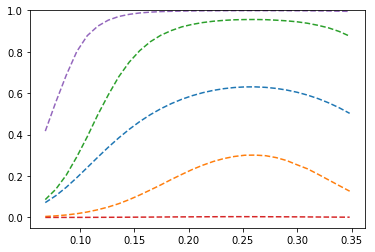

In [34]:
plt.plot(subsample01["Z"][subsample01["LOG_STELLAR_MASS"]==mass_slices[0]], 
         subsample01["mean"][subsample01["LOG_STELLAR_MASS"]==mass_slices[0]], '--')
plt.plot(subsample01["Z"][subsample01["LOG_STELLAR_MASS"]==mass_slices[0]], 
         subsample01["25%"][subsample01["LOG_STELLAR_MASS"]==mass_slices[0]], '--')
plt.plot(subsample01["Z"][subsample01["LOG_STELLAR_MASS"]==mass_slices[0]], 
         subsample01["75%"][subsample01["LOG_STELLAR_MASS"]==mass_slices[0]], '--')
plt.plot(subsample01["Z"][subsample01["LOG_STELLAR_MASS"]==mass_slices[0]], 
         subsample01["2.5%"][subsample01["LOG_STELLAR_MASS"]==mass_slices[0]], '--')
plt.plot(subsample01["Z"][subsample01["LOG_STELLAR_MASS"]==mass_slices[0]], 
         subsample01["97.5%"][subsample01["LOG_STELLAR_MASS"]==mass_slices[0]], '--')
plt.ylim([-0.05,1])

plt.show()